Andrea Rahmadanisya 1301184146

Rizky Fauzi Ramadhani 1301184144

## import library 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import timeit

In [ ]:
plt.style.use('ggplot')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

pip install tpot

In [ ]:
# pip install tpot

In [ ]:
from tpot import TPOTClassifier

## Read Data

In [ ]:
dt = pd.read_csv('weatherAUS.csv')
dt

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
dt.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Data Exploration

In [ ]:
dt = dt.drop('Date', axis=1)
dt

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
#check empty
def empty_check(Data) :
  new_data = Data.dropna(how ='any',axis = 0) 
  print('==========Data==============')
  print("Panjang dataframe  sebelumnya:", len(Data)) 
  print("Panjang dataframe  setelah dilakukan pengecekan empty value :", len(new_data))  
  print("Jumlah baris Data dengan setidaknya 1 empty value : ", (len(Data)-len(new_data)))
print(empty_check(dt))

==========Data==============
Panjang dataframe  sebelumnya: 145460
Panjang dataframe  setelah dilakukan pengecekan empty value : 56420
Jumlah baris Data dengan setidaknya 1 empty value :  89040
None


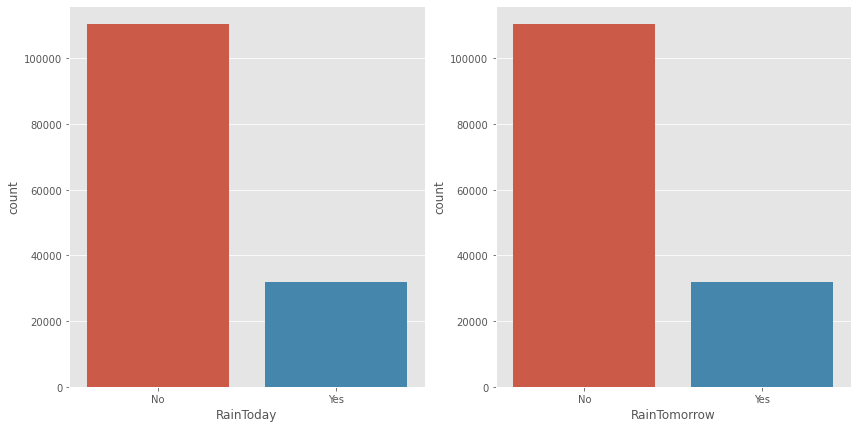

In [ ]:
# Visualisasi data RainToday dengan RainTomorrow
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(x='RainToday',data=dt)

plt.subplot(122)
sns.countplot(x='RainTomorrow',data=dt)
plt.show()

In [ ]:
# Menghapus data duplikat dalam dataframe
print('Jumlah Duplikat Data:', dt.duplicated().sum())
dt.drop_duplicates(keep='first', inplace=True)
print('Jumlah Duplikat Data Setelah Dihapus:', dt.duplicated().sum())

Jumlah Duplikat Data: 215
Jumlah Duplikat Data Setelah Dihapus: 0


## Preprocessing

membersihkan missing value dengan cara mengisin data numerik dengan mean dan data categorical dengan nilai modus

In [ ]:
#fill NAN/missing value numerik using mean
dt['MinTemp'].fillna(dt['MinTemp'].mean(), inplace=True)
dt['MaxTemp'].fillna(dt['MaxTemp'].mean(), inplace=True)
dt['Rainfall'].fillna(dt['Rainfall'].mean(), inplace=True)
dt['Evaporation'].fillna(dt['Evaporation'].mean(), inplace=True)
dt['Sunshine'].fillna(dt['Sunshine'].mean(), inplace=True)
dt['WindGustSpeed'].fillna(dt['WindGustSpeed'].mean(), inplace=True)
dt['WindSpeed9am'].fillna(dt['WindSpeed9am'].mean(), inplace=True)
dt['WindSpeed3pm'].fillna(dt['WindSpeed3pm'].mean(), inplace=True)
dt['Humidity9am'].fillna(dt['Humidity9am'].mean(), inplace=True)
dt['Humidity3pm'].fillna(dt['Humidity3pm'].mean(), inplace=True)
dt['Pressure9am'].fillna(dt['Pressure9am'].mean(), inplace=True)
dt['Pressure3pm'].fillna(dt['Pressure3pm'].mean(), inplace=True)
dt['Cloud9am'].fillna(dt['Cloud9am'].mean(), inplace=True)
dt['Cloud3pm'].fillna(dt['Cloud3pm'].mean(), inplace=True)
dt['Temp9am'].fillna(dt['Temp9am'].mean(), inplace=True)
dt['Temp3pm'].fillna(dt['Temp3pm'].mean(), inplace=True)

In [ ]:
#fill missing value categorical using modus
dt['WindGustDir'].fillna('W', inplace=True)
dt['WindDir9am'].fillna('N', inplace=True)
dt['WindDir3pm'].fillna('SE', inplace=True)
dt['RainToday'].fillna('No', inplace=True)
dt['RainTomorrow'].fillna('No', inplace=True)

# len(dt)
dt.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Data Transformation

In [ ]:
#labl encode
dt['Location']= LabelEncoder().fit_transform(dt['Location']) 
dt['WindGustDir']= LabelEncoder().fit_transform(dt['WindGustDir']) 
dt['WindDir9am']= LabelEncoder().fit_transform(dt['WindDir9am']) 
dt['WindDir3pm']= LabelEncoder().fit_transform(dt['WindDir3pm']) 
dt['RainToday']= LabelEncoder().fit_transform(dt['RainToday']) 
dt['RainTomorrow']= LabelEncoder().fit_transform(dt['RainTomorrow']) 

dt

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


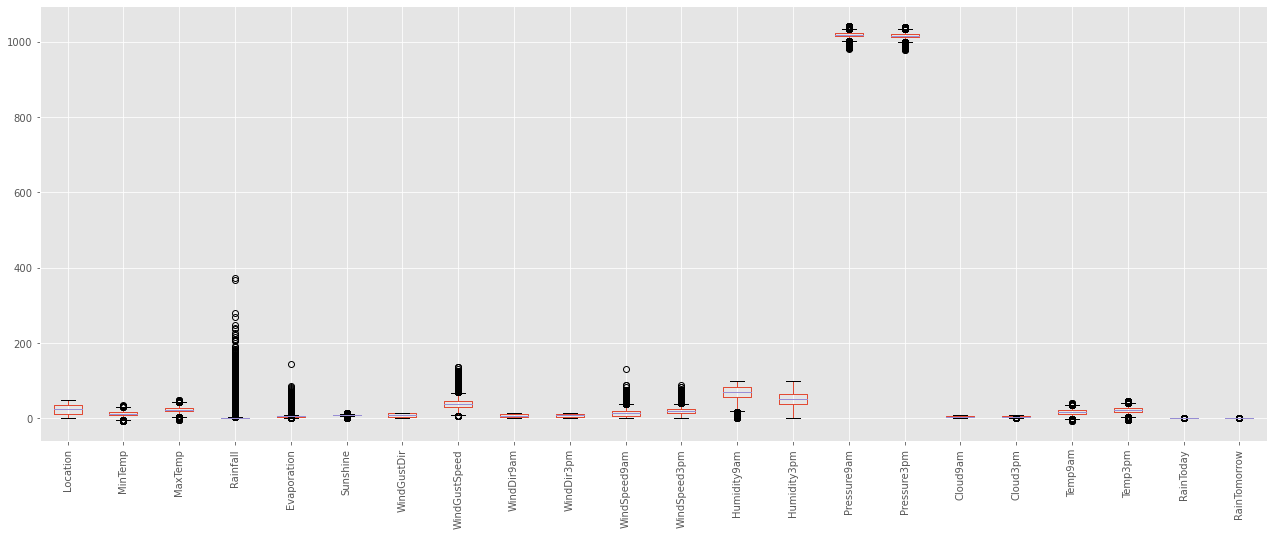

In [ ]:
#mencari data outlier/data pencilan
boxplot = dt.loc[:].boxplot(figsize=(22,8), rot=90)

In [ ]:
#menghandle outlier menggunakan IQR
IQR_Evaporation = dt['Evaporation'].quantile(0.75) - dt['Evaporation'].quantile(0.25)
IQR_sinar = dt['Sunshine'].quantile(0.75) - dt['Sunshine'].quantile(0.25)

dt['Rainfall'].loc[dt['Rainfall'] > dt['Rainfall'].quantile(0.75) * 1.5] = dt['Rainfall'].quantile(0.75) * 1.5
dt['Evaporation'].loc[dt['Evaporation'] > dt['Evaporation'].quantile(0.75) + (1.5 * IQR_Evaporation)] = dt['Evaporation'].quantile(0.75) + (1.5 * IQR_Evaporation)
dt['Sunshine'].loc[dt['Sunshine'] > dt['Sunshine'].quantile(0.75) + (1.5 * IQR_sinar)] = dt['Sunshine'].quantile(0.75) + IQR_sinar
dt['Sunshine'].loc[dt['Sunshine'] < dt['Sunshine'].quantile(0.25) - (1.5 * IQR_sinar)] = dt['Sunshine'].quantile(0.25) + IQR_sinar

## cek korelasi

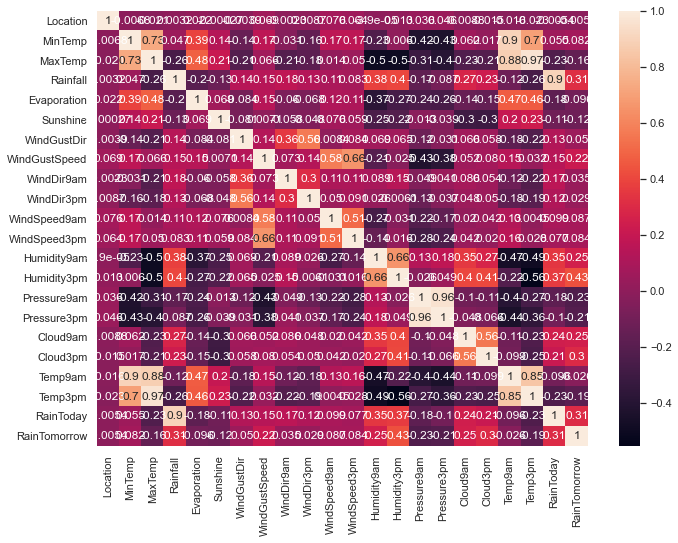

In [ ]:
#check correlation
sns.set(rc={'figure.figsize':(11,8)})
def heatmap(data):
  sns.heatmap(data.corr(), vmax=1, annot=True)

heatmap(dt)

In [ ]:
# Drop fitur dengan korelasi tinggi terhadap data feature lainnya selain data target "RainTomorrow"
dt = dt.drop(['Temp3pm','Temp9am','Humidity9am', 'MaxTemp'],axis=1)
dt.shape

(145245, 18)

## Split Data

In [ ]:
#memisahkan data feature dan data target
x = dt.drop('RainTomorrow', axis=1)
y = dt['RainTomorrow']

In [ ]:
# Melakukan splitting data train dan data test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [ ]:
# Melakukan scaling data menggunakan metode standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Auto ML (TPOT)

In [ ]:
# Melakukan Training menggunakan Modelling dari TPOT Classifier

start = timeit.default_timer() #waktu mulai

tpot = TPOTClassifier(verbosity=2, generations=5)
tpot.fit(X_train_scaled, y_train)

stop = timeit.default_timer() #waktu selesai
lama_eksekusi = stop - start #satuan detik
print('Total Waktu Eksekusi TPOT:', round(lama_eksekusi/3600), 'Jam')

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8540741552700262

Generation 2 - Current best internal CV score: 0.8540741552700262

Generation 3 - Current best internal CV score: 0.8545560840918277

Generation 4 - Current best internal CV score: 0.8545560840918277

Generation 5 - Current best internal CV score: 0.8560965864033981

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=100, n_jobs=1, subsample=0.7000000000000001, verbosity=0)
Total Waktu Eksekusi TPOT: 17 Jam


In [ ]:
# Pipiline terbaik yang ditemukan TPOT dalam 5 generasi
tpot.fitted_pipeline_

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=6, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.7000000000000001,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

In [ ]:
# Test accuracy
tpot.score(X_test_scaled, y_test)

0.8591689903266894

In [ ]:
# Prediksi data test menggunakan model training
y_pred_tpot = tpot.predict(X_test_scaled)

In [ ]:
# Evaluasi model menggunakan Precision, recall, dan F1 score
print(confusion_matrix(y_test, y_pred_tpot), '\n')
print(classification_report(y_test, y_pred_tpot))

[[21598  1229]
 [ 2862  3360]] 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22827
           1       0.73      0.54      0.62      6222

    accuracy                           0.86     29049
   macro avg       0.81      0.74      0.77     29049
weighted avg       0.85      0.86      0.85     29049



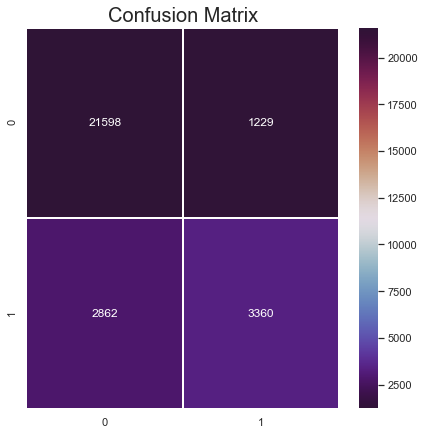

In [ ]:
# Visualisasi confusion matrix
plt.rcParams['figure.figsize'] = (7,7)
sns.heatmap(confusion_matrix(y_test, y_pred_tpot), annot = True, fmt='.0f', linewidths=0.5, cmap='twilight_shifted')
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
dt.to_csv('Hasil_Tubes_AML1.csv',index = False,encoding='utf-8')